<a href="https://colab.research.google.com/github/yeekha89/Assignment-Submmissions/blob/main/Homework_2_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [144]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import ElasticNet, Lasso, Ridge
from sklearn.model_selection import KFold, cross_val_score

In [92]:
#load data
diabetes = load_diabetes()

In [93]:
#display dataset's description
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [94]:
#confirm number of samples (rows)
diabetes.data.shape

(442, 10)

In [95]:
#confirm number features (columns)
diabetes.target.shape

(442,)

In [96]:
#names that correspond to each column in the data array:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [97]:
pd.set_option('display.precision', 4) #max number of digits to display on right of decimal point
pd.set_option('display.max_columns', 9) #max number of columns to display when output DataFrame's string representation
pd.set_option('display.width', None) #specifies width in characters of your Command Prompt

In [98]:
#create DataFrame
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target

In [99]:
diabetes_df.head()

,age,sex,bmi,bp,...,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,...,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,...,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,...,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,...,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,...,-0.0026,-0.0320,-0.0466,135.0


In [100]:
diabetes_df.tail()

,age,sex,bmi,bp,...,s4,s5,s6,target
437,0.0417,0.0507,0.0197,0.0597,...,-0.0026,0.0312,0.0072,178.0
438,-0.0055,0.0507,-0.0159,-0.0676,...,0.0343,-0.0181,0.0445,104.0
439,0.0417,0.0507,-0.0159,0.0173,...,-0.0111,-0.0469,0.0155,132.0
440,-0.0455,-0.0446,0.0391,0.0012,...,0.0266,0.0445,-0.0259,220.0
441,-0.0455,-0.0446,-0.0730,-0.0814,...,-0.0395,-0.0042,0.0031,57.0


In [101]:
#sampling for random selection for graphing purposes
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [102]:
#using seaborn and matplotlib to display scatter plots of each features
sns.set(font_scale=2)
sns.set_style('whitegrid')

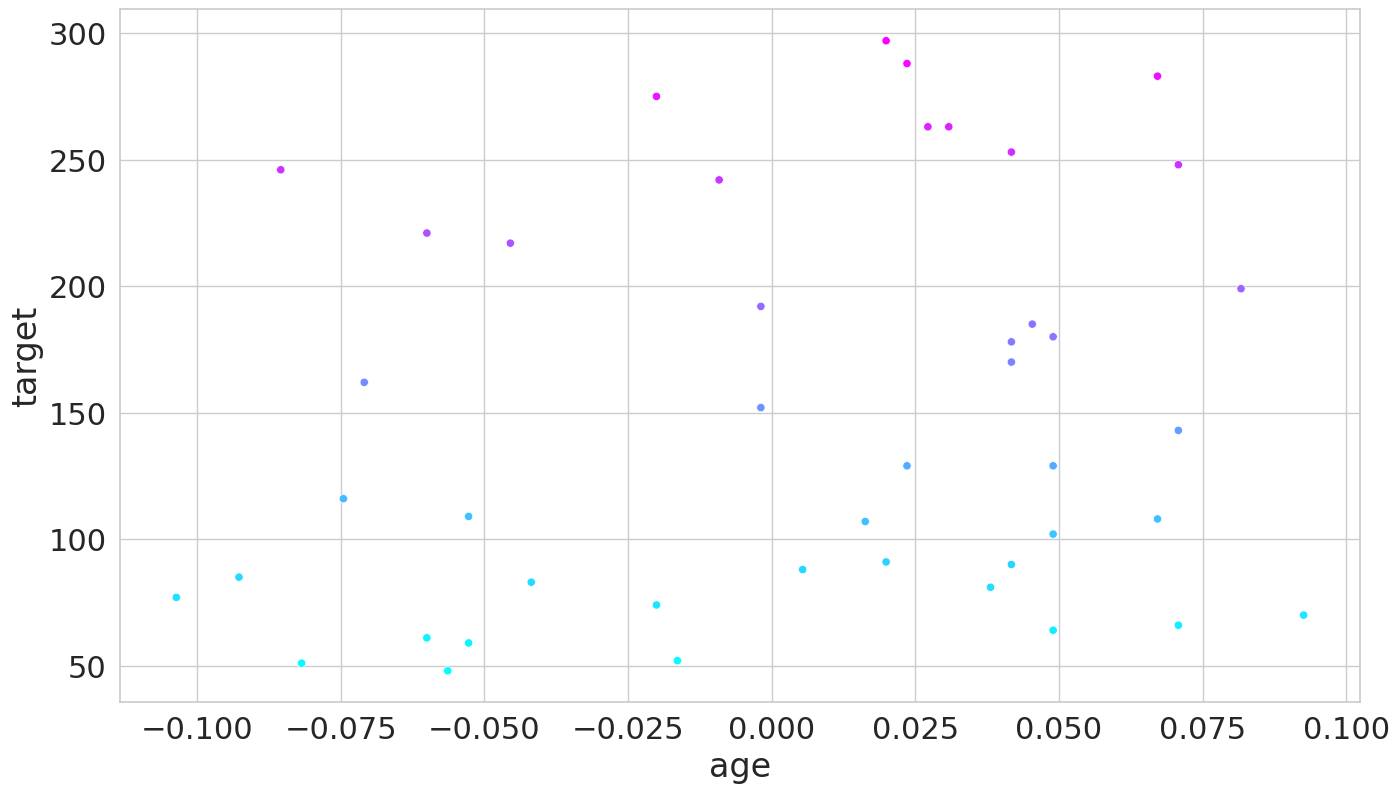

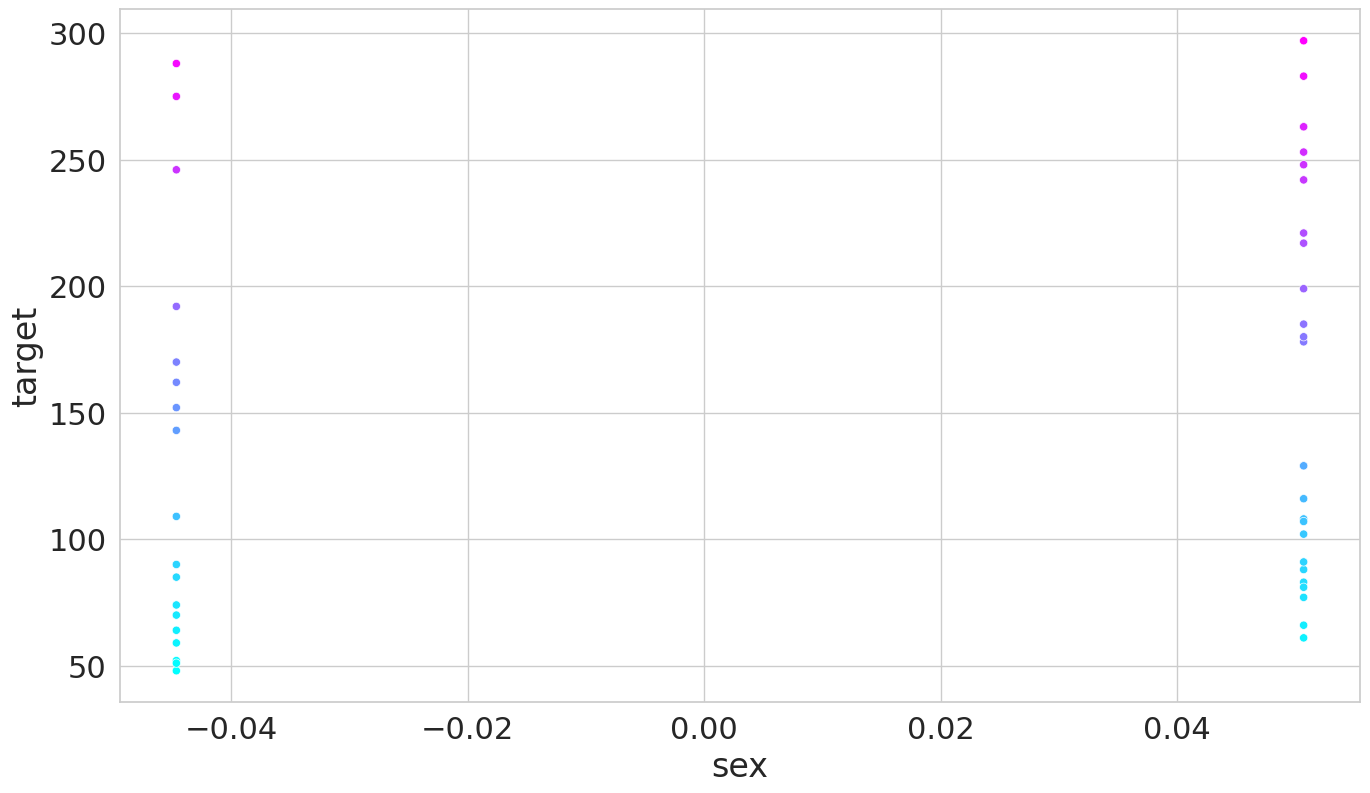

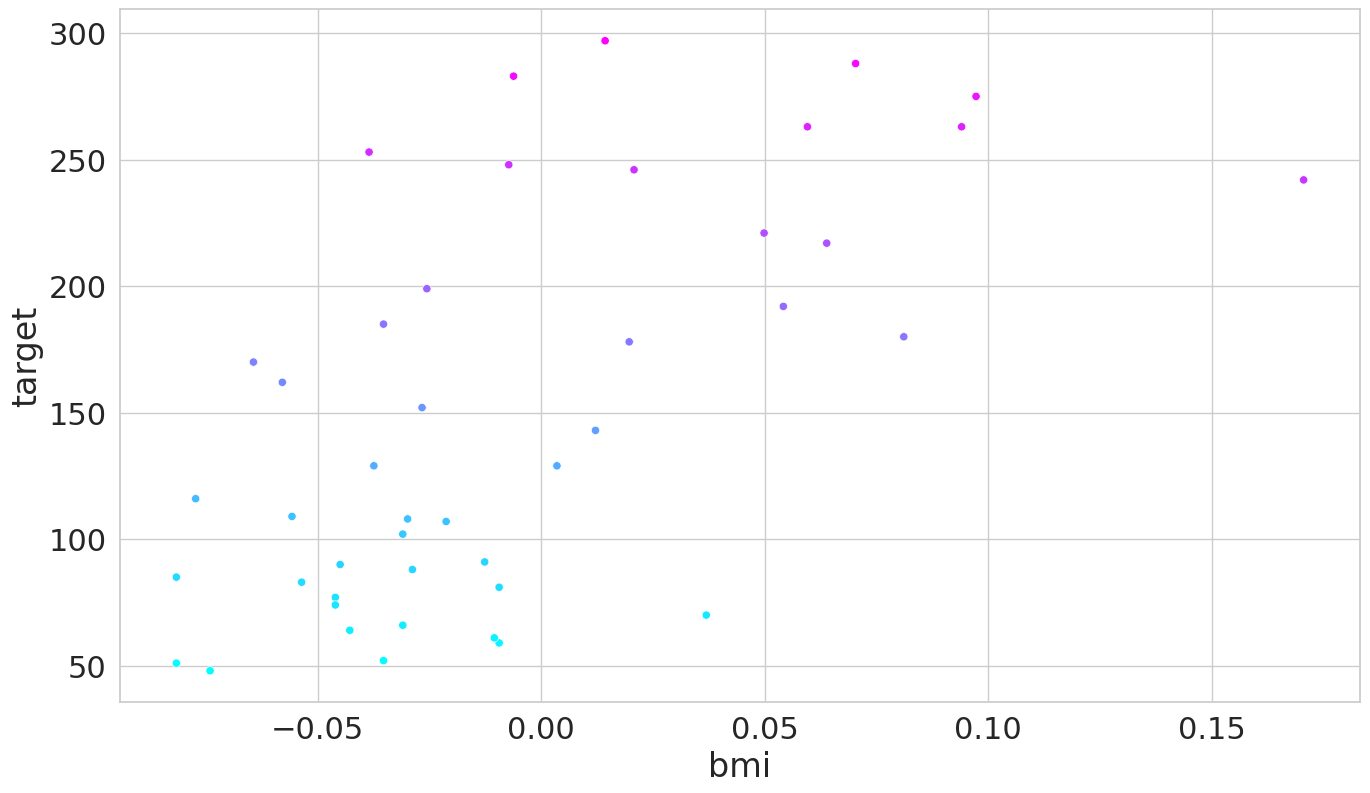

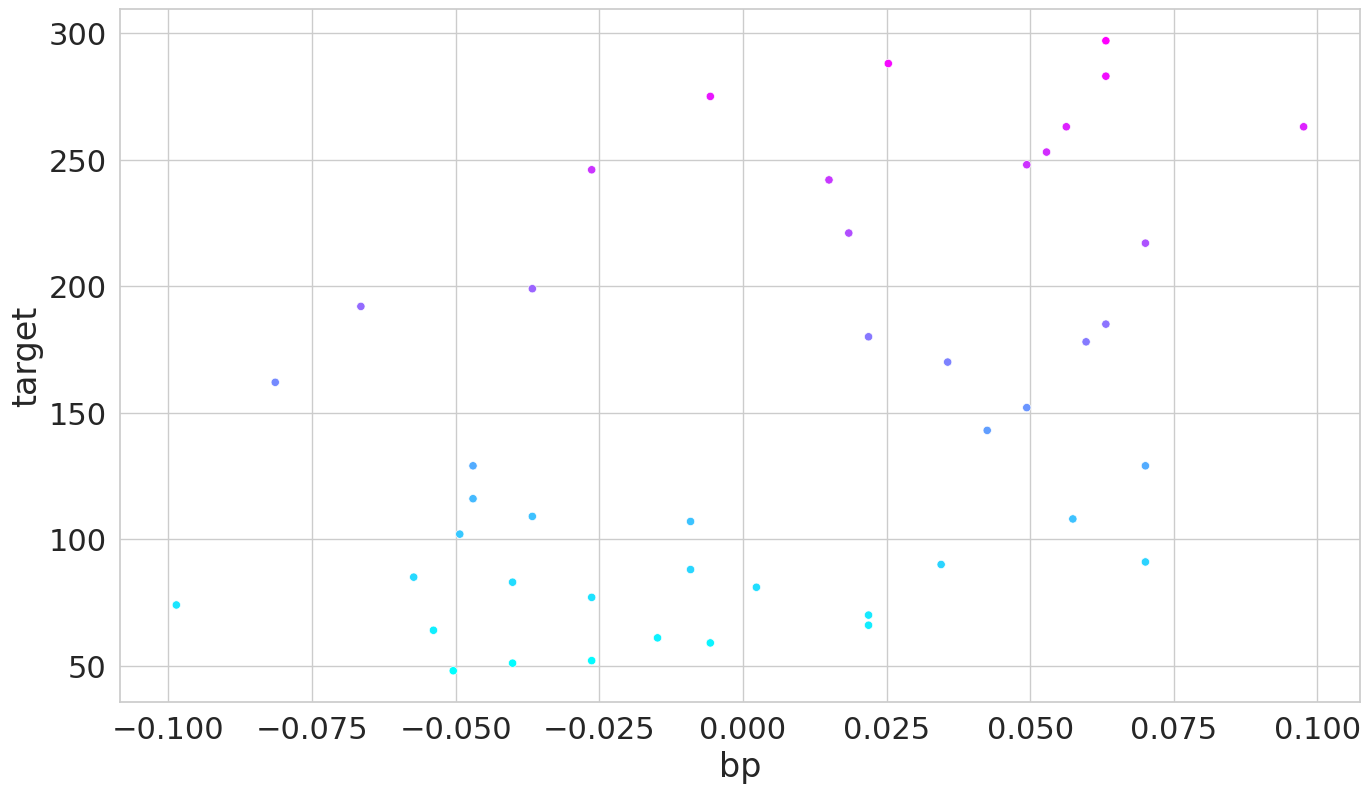

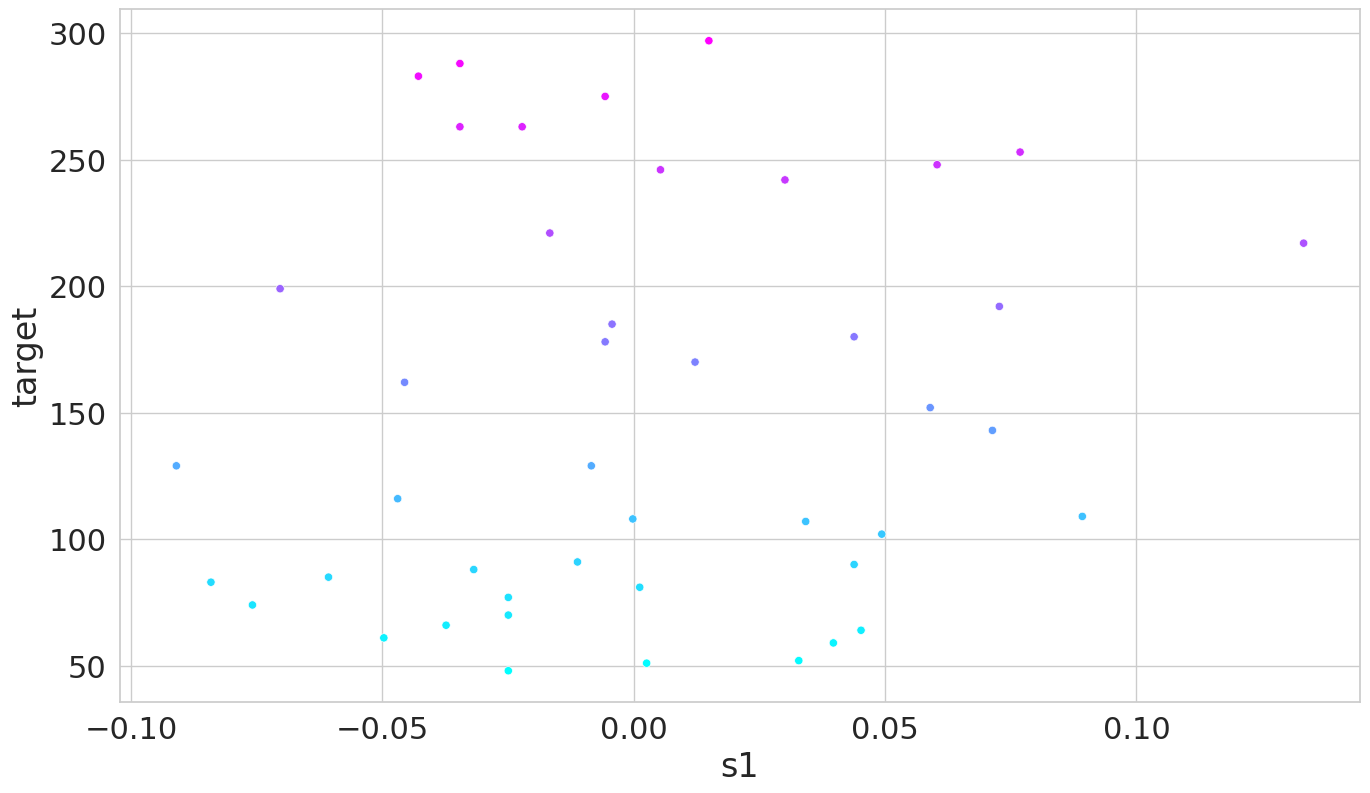

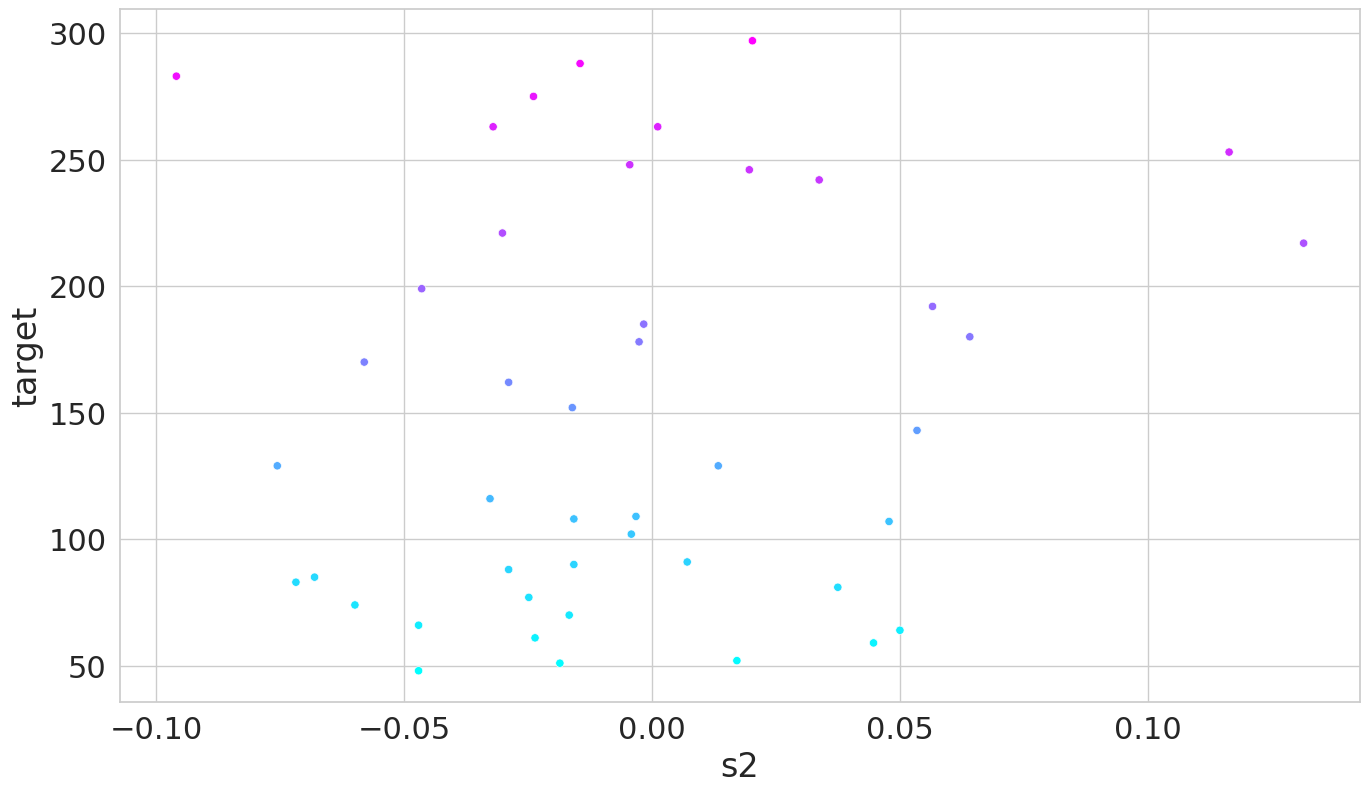

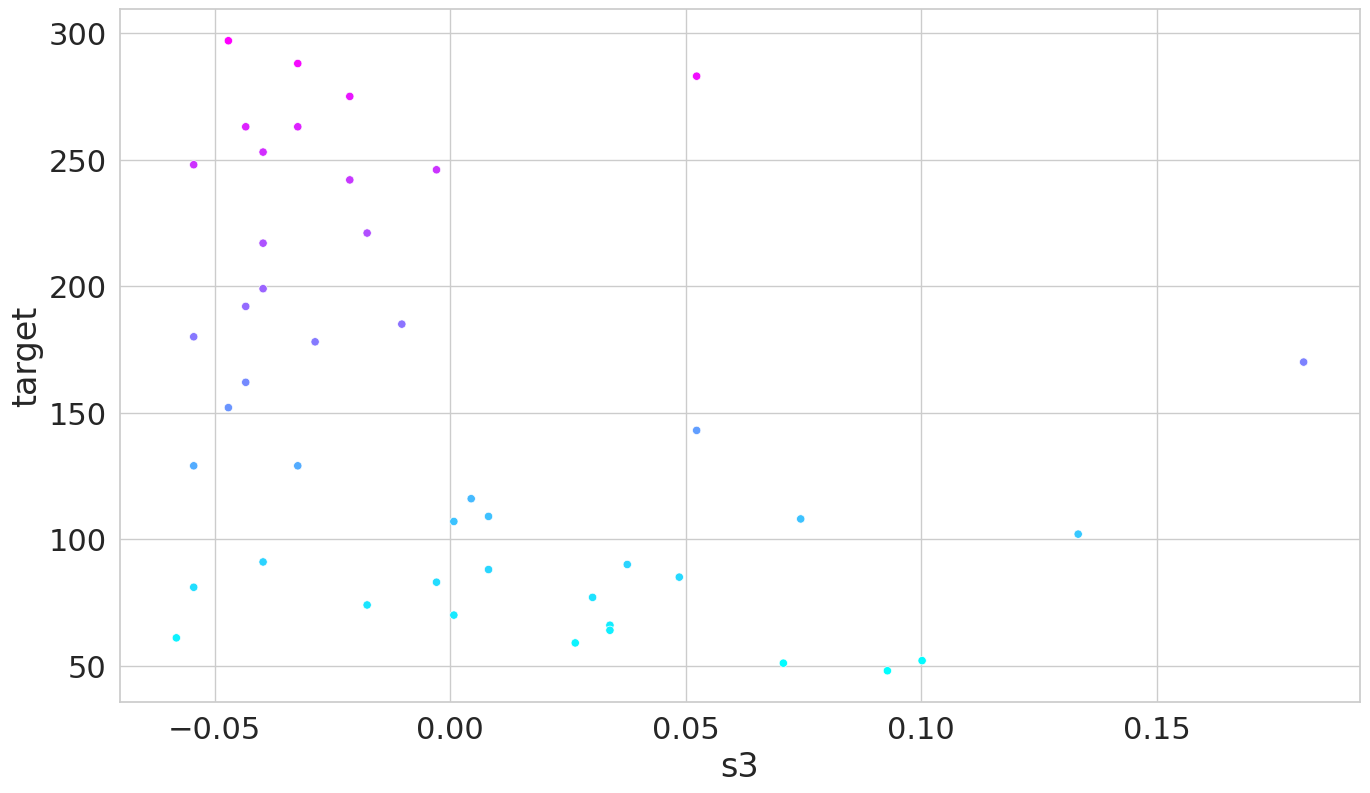

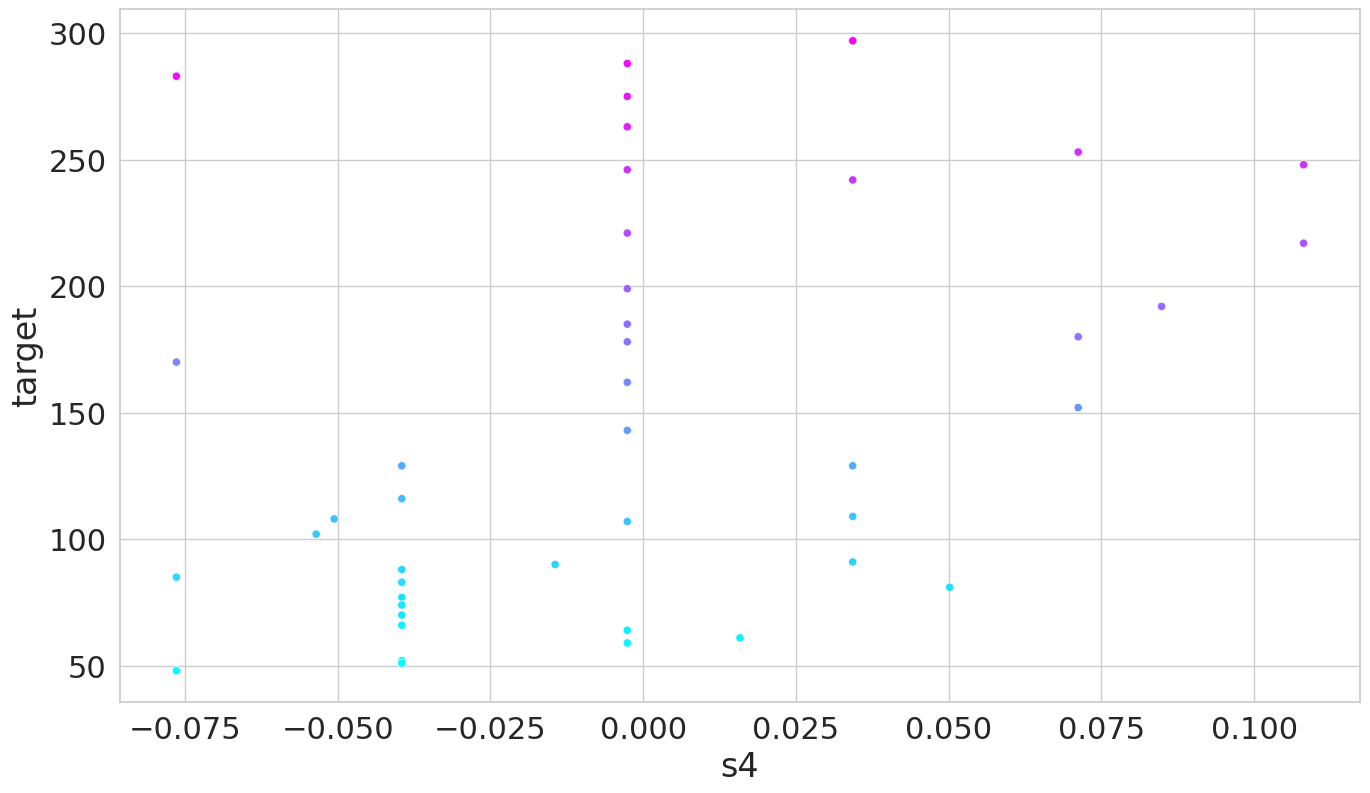

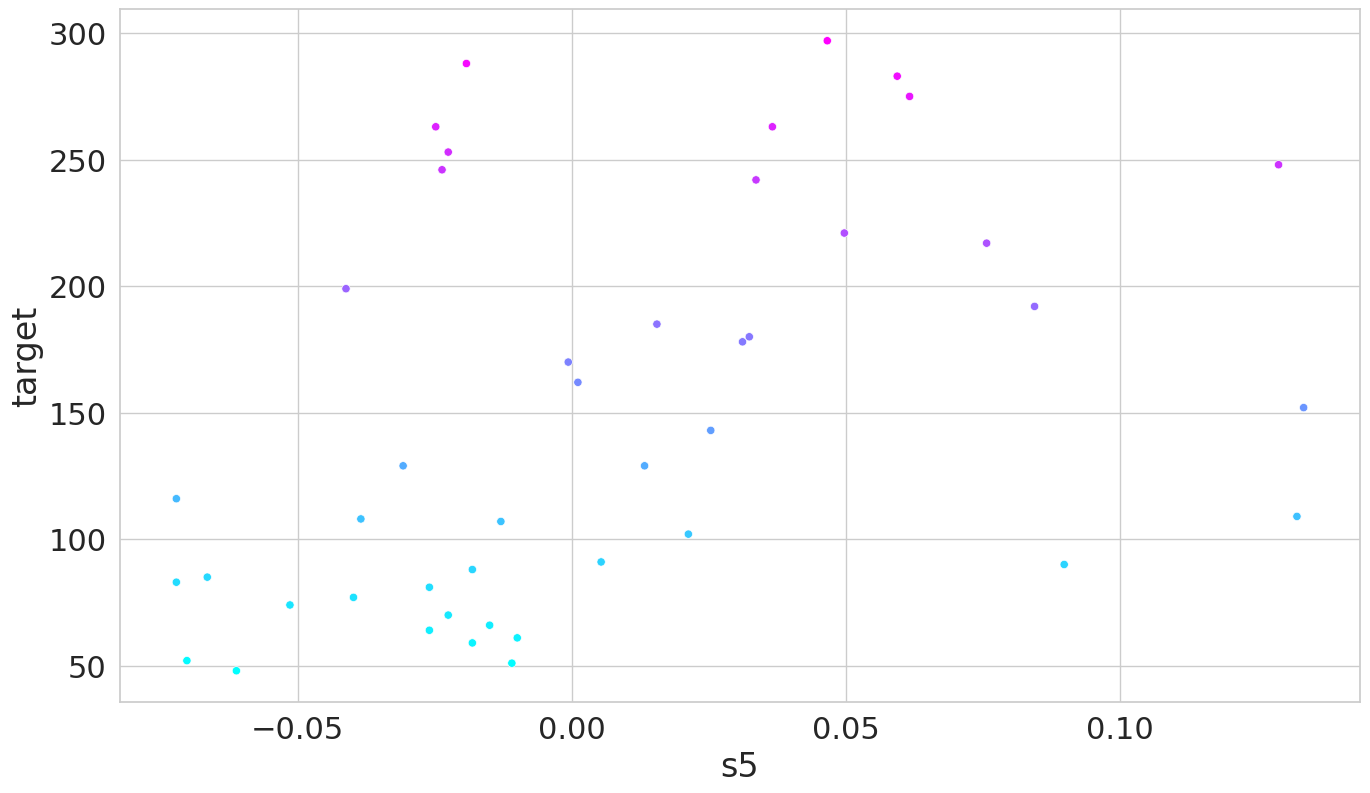

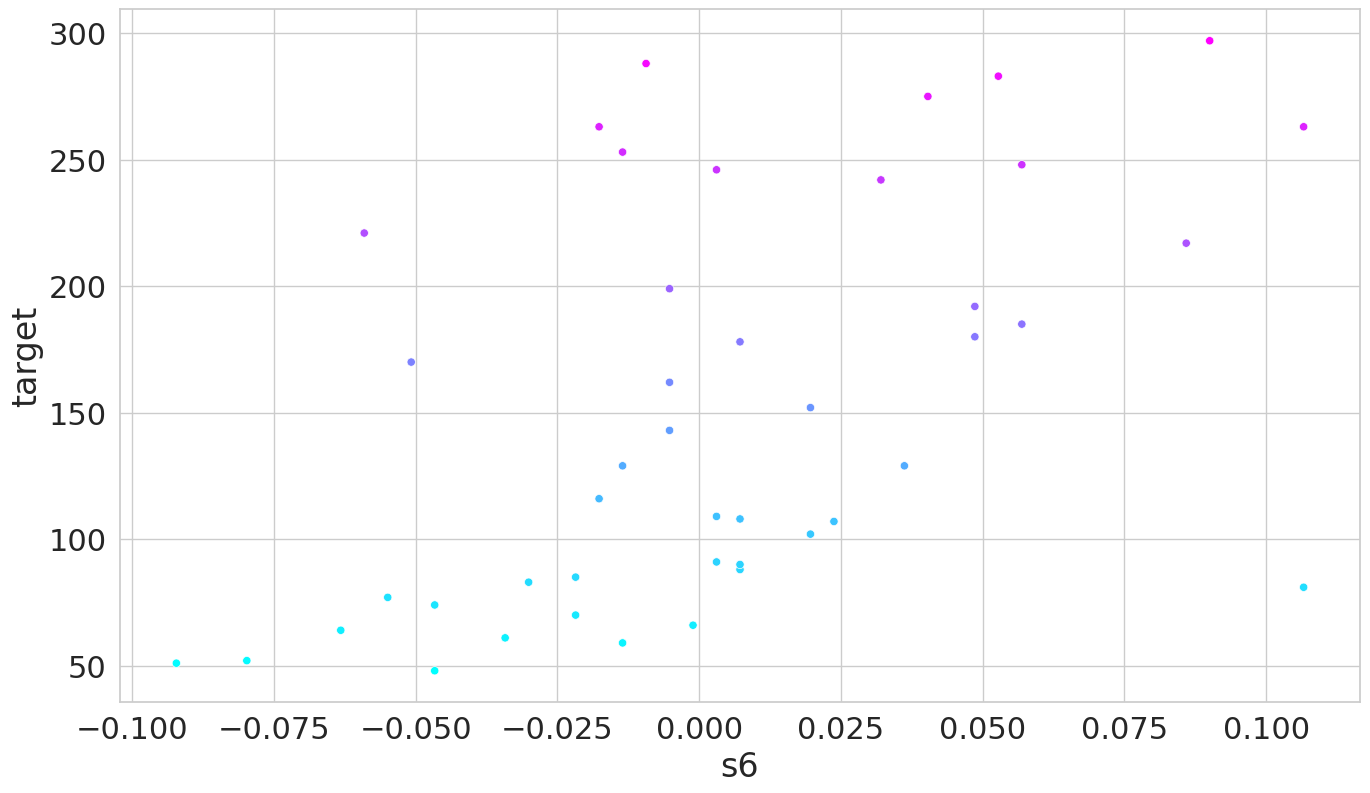

In [103]:
#display scatter plot
for feature in diabetes.feature_names:
  plt.figure(figsize=(16,9))
  sns.scatterplot(data=sample_df, x=feature, y='target', hue='target', palette='cool', legend=False)

In [104]:
#splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, random_state=11)

In [105]:
X_train.shape

(331, 10)

In [106]:
X_test.shape

(111, 10)

In [107]:
#train the model
lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

LinearRegression()

In [108]:
#produces separate coefficients
for i, name in enumerate(diabetes.feature_names):
  print(f'{name:>10}: {lr.coef_[i]}')

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


In [109]:
#testing the model
predicted = lr.predict(X_test)
expected = y_test

In [110]:
#view first five predictions and their corresponding expected values
predicted[:5]

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [111]:
expected[:5]

array([ 79.,  55., 109., 178.,  39.])

In [112]:
#visualizing the expected vs. predicted values
df = pd.DataFrame()
df['Expected'] = pd.Series(expected)
df['Predicted'] = pd.Series(predicted)

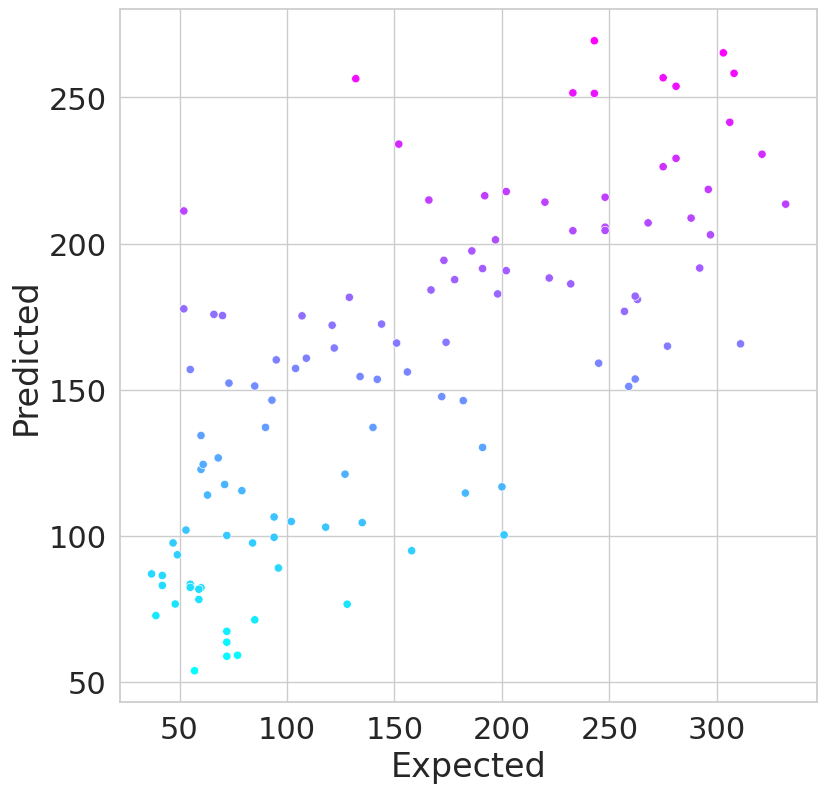

In [120]:
#plot data as a scatter plot with the expected (target) along the x-axis and the predicted along the y-axis
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)

In [122]:
#set x and y axes' limits to use the same scale along both axes
start = min(expected.min(), predicted.min())
end = max(expected.max(), predicted.max())

In [124]:
axes.set_xlim(start, end)

(37.0, 332.0)

In [126]:
axes.set_ylim(start, end)

(37.0, 332.0)

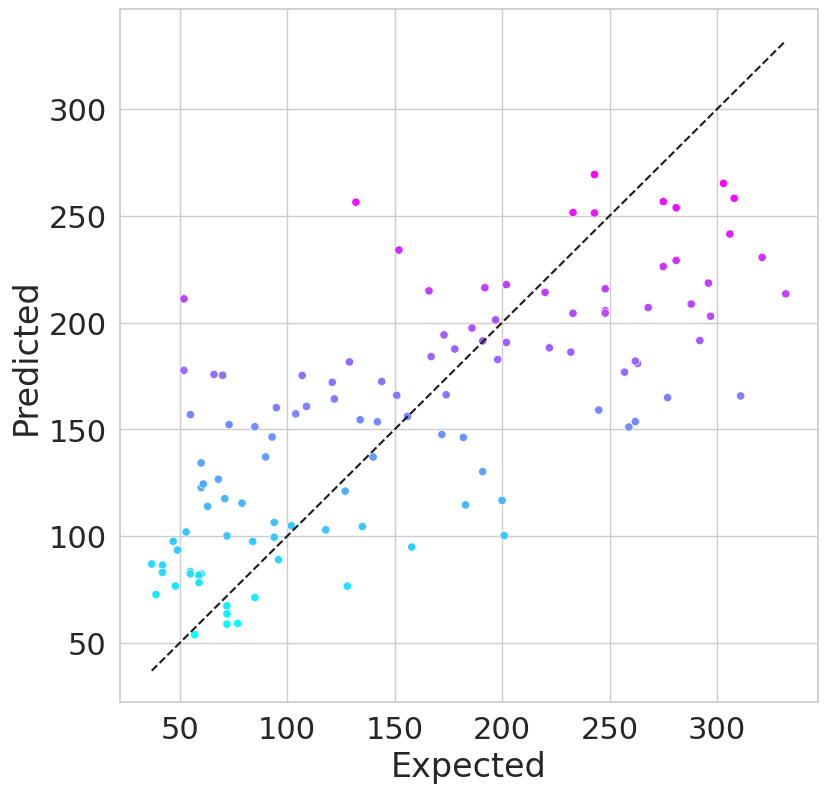

In [129]:
#plot a line with the scatterplot that represents perfect predictions
figure = plt.figure(figsize=(9,9))
axes = sns.scatterplot(data=df, x='Expected', y='Predicted', hue='Predicted', palette='cool', legend=False)
line = plt.plot([start, end], [start, end], 'k--')

In [133]:
#calculate the coefficient of determination
metrics.r2_score(expected, predicted)

0.5322429620529407

In [139]:
#calculate mean squared error
metrics.mean_squared_error(expected, predicted)

3458.2307025173577

In [142]:
#train and evaluate models with estimators to determine whether any produces better result thatn the lr estimator
estimators = {
    'LinearRegression': lr,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [145]:
#return estimators
for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=diabetes.data,
                             y=diabetes.target,
                             scoring='r2',
                             cv=kfold)
    print(f'{estimator_name:>16}: ' +
          f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
      ElasticNet: mean of r2 scores=-0.002
           Lasso: mean of r2 scores=0.339
           Ridge: mean of r2 scores=0.421
